## Movie Recommendation system with python

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline


In [2]:
#Reading the ratings dataset.
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df1 = pd.read_csv('data/u.data', sep='\t', names=column_names)
df1.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [3]:
df2 = pd.read_csv("data/Movie_Id_Titles")
df2.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [9]:
df=pd.merge(df1,df2,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


## Exploratory analysis

In [23]:
#average rating for movies
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [25]:
#no of rating for movies
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [27]:
#creating dataframe with average ratings and no of ratings
ratings=pd.DataFrame(df.groupby('title')['rating'].mean())
ratings['no of ratings']=df.groupby('title')['rating'].count()
ratings.head()

,rating,no of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


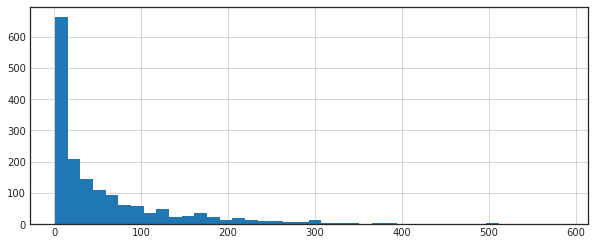

In [34]:
#visualizing the ratings
plt.figure(figsize=(10,4))
ratings['no of ratings'].hist(bins=40)

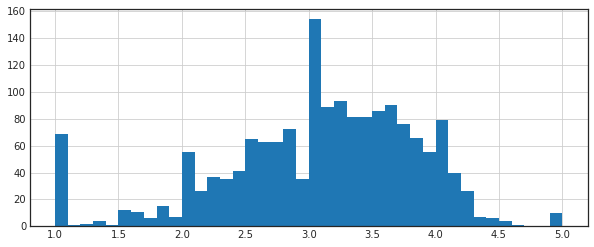

In [37]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=40)

## Recommending similar movies

#next step is create a matrix with user_ids on one axis and movie titles on another.
#each cell will then consist of rating of movie of particular user

In [88]:
moviemat=df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
#most_rated movie
ratings['no of ratings'].sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: no of ratings, dtype: int64

In [55]:
#Let's choose two movies to focus on: starwars, a sci-fi movie. And Dumb and Dumber, a comedy.
star_wars_user_ratings=moviemat['Star Wars (1977)']
dumb_user_ratings=moviemat['Liar Liar (1997)']
similar_to_star_wars=moviemat.corrwith(star_wars_user_ratings)
similar_to_liarliar=moviemat.corrwith(dumb_user_ratings)

/home/venkat/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/venkat/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [98]:
corr_starwars=pd.DataFrame(similar_to_star_wars,columns=['correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars['correlation'].sort_values(ascending=False).head(10)
corr_starwars=corr_starwars.join(ratings['no of ratings'])
corr_starwars[corr_starwars['no of ratings']>100].sort_values('correlation',ascending=False).head()

,correlation,no of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [99]:
corr_liarliar=pd.DataFrame(similar_to_liarliar,columns=['correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar['correlation'].sort_values(ascending=False).head(10)
corr_liarliar=corr_liarliar.join(ratings['no of ratings'])
corr_liarliar[corr_liarliar['no of ratings']>100].sort_values('correlation',ascending=False).head()

,correlation,no of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
